In [138]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score , r2_score 
from sklearn.preprocessing import StandardScaler
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

In [139]:
vectorizer = TfidfVectorizer()
with open('C:/Hammad Aslam/BS IT (post ADP)/3rd Semester/Capstone Project/Project/backend/datasets/categories/allFiles/computers_laptops.json', 'r') as f:
    data = json.load(f)
len(data[28]['reviews'])

25

In [150]:
X = []
Y = []

# for product in data:
for review in data[28]['reviews']:
    # vectorReview = vectorizer.fit_transform([review['review_body']])
    # print(vectorReview)
    X.append(review['review_body'])
    Y.append(1 if review['review_helpfulness'] == "helpful" else 0)
    # Y.append(review['review_helpfulness'])
# X = vectorizer.fit_transform(X)
X, Y

(['When I first received it, I was a little worried because the shipping box was very banged up, but the computer inside was intact and works well!',
  'If someone want the Asus with blue ray they should check ASUS N71JQ-A1 instead of ASUS N71JQ-X1.',
  "I've had this laptop for nearly two years. No problems with it at all, it is amazing. Only complaints are minor. Comes loaded with bloatware, but that's an easy fix. Also it runs very hot, so do yourself a favor and get a good laptop cooler. As long as it has enough ventilation it should be fine. Mine has seen some pretty heavy high end usage and it hasn't melted yet.",
  'He comprado Laptop ASUS N71Jq el 27 de octubre de 2010,ahora a principios de octubre de 2011 SE APAGA SOLA,le compre un cooler pensando en recalentamiento y siempre se apaga, ESTAS LAPTOP NO SIRVEN, AMIGOS SI QUIEREN COMPRAR LAPTOP NO COMPREN ASUS, me comunique con la ASUS y me dicen que se comunicaran conmigo a mas tardar en 48 horas, pero mientras tanto la informac

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.35, random_state=42)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
# y_train = vectorizer.fit_transform(y_train)
# y_test = vectorizer.transform(y_test)
X_train, X_test, y_train, y_test

AttributeError: 'dict' object has no attribute 'lower'

In [142]:
# Train the scaler using the entire training data (one-time fit)
scaler = StandardScaler(with_mean=False)  # Or your chosen scaler
scaler.fit(X_train)
# print(f"X_train:{X_train}")
# print(f"X_test:{X_test}")
# print(f"y_train:{y_train}")
# print(f"y_test:{y_test}")
print(scaler)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

StandardScaler(with_mean=False)


In [143]:
# encoder = LabelEncoder()
# y_train_encoded = encoder.fit_transform(y_train.toarray())

In [144]:
# Train a Random Forest Regressor model
# n_estimators=100 means that there are 100 decision trees
model = RandomForestRegressor(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)

# model = BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=100, random_state=42), n_estimators=10)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [145]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using accuracy (more suitable for classification)
accuracy = accuracy_score(y_test, y_pred.round())
print(f'Accuracy: {accuracy}')
X_test

Accuracy: 1.0


<9x834 sparse matrix of type '<class 'numpy.float64'>'
	with 424 stored elements in Compressed Sparse Row format>

In [146]:
# Use the model to predict helpfulness scores for new reviews


from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk


def predict_sentiment(features):
    features_scaled = scaler.transform(features)
    return model.predict(features_scaled)[0]


# Example usage:
features = ["I bought this Compaq A1500 this week and am more than satisfied with it. Simple installation without any problems, excellent photo quality resolution even on plain paper, very good managing software and the best part is, I didn't need any customer support to make it run :). Very good product with excellent features, quality and resolution. Believe me it's better than the best available in this price range.", "I bought the A1500 based on the Compaq name and the excellent results I`ve had with their other products, however I started having problems immediatly, it just would not work. When I called Tech support, I was informed that it was not campatible with my operating system. When I pointed out I was using Win 98se on a Compaq comupter they tried to help. I was able to finally get it installed after being on the phone with Tech Support for almost 2 hours. It worked for one day then quit printing. When I again called Tech Support and spent another hour on the phone the printer finally started working but the Scanner quit. As I was buying a second computer with Win XP I asked if it would be compatible and was assured that it was. When I was ready to install the A1500 on the new computer, I called Tech Support and they taslked me through the whole process. Not only would it not install it crashed my system and I had to do a full restore. As I waited to long to return it, it is now seating on a shelf collecting dust until I can find someone who will take it off my hands. In the mean time I`m still looking for a good multifunction that will work as advertised. I would not recommend the A1500 to anyone who does not have money and time to waste."]  # Replace with actual feature values
# text = features[0]
features = vectorizer.transform(features)
# print(features)
sentiment_score = predict_sentiment(features)
print(f'Helpfulness score by random forest: {sentiment_score}')

# sia = SentimentIntensityAnalyzer()
# sentiment_scores = sia.polarity_scores(text)
# # Normalize the value to the old range
# old_range = (sentiment_scores['compound'] - (-1)) / (1 - (-1))

# new_value = old_range * (0.9 - 0.1) + 0.1

# print(f"sentiment score by intensity analyzer: {new_value}")
features

Helpfulness score by random forest: 0.0


<2x834 sparse matrix of type '<class 'numpy.float64'>'
	with 114 stored elements in Compressed Sparse Row format>

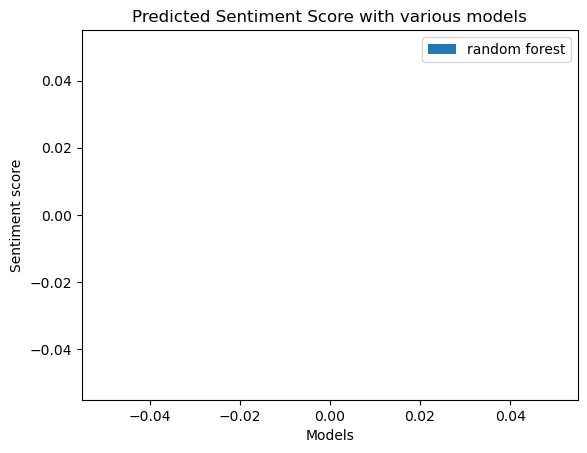

In [147]:
# Define the width of the bars
import matplotlib.pyplot as plt
import numpy as np

bar_width = 0.45
indices = np.arange((sentiment_score))
plt.bar(indices - bar_width/2, sentiment_score, bar_width, label='random forest')
# plt.bar(indices + bar_width/2, new_value, bar_width, label='intensity analyzer')
plt.xlabel('Models')
plt.ylabel('Sentiment score')
plt.title('Predicted Sentiment Score with various models')
plt.legend()
# plt.grid()
plt.show()